<a href="https://colab.research.google.com/github/adhalya/Analise_prova_avalie.ce/blob/main/An%C3%A1lise_Desempenho_Prova_Avalie_CE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [121]:
estudante_mt = pd.read_csv('https://raw.githubusercontent.com/adhalya/Analise_prova_avalie.ce/refs/heads/main/Base%20de%20Dados/HABILIDADE_DESEMPENHO_ESTUDANTE_MT_5%C2%BA%20ANO.csv', sep=';')
estudante_lp = pd.read_csv('https://raw.githubusercontent.com/adhalya/Analise_prova_avalie.ce/refs/heads/main/Base%20de%20Dados/HABILIDADE_DESEMPENHO_ESTUDANTE_LP_5%C2%BA%20ANO.csv', sep=';')
habilidades_lp = pd.read_csv('https://raw.githubusercontent.com/adhalya/Analise_prova_avalie.ce/refs/heads/main/Base%20de%20Dados/DADOS_ACERTO_POR_HABILIDADE_PORTUGU%C3%8AS_5%C2%BA%20ANO.csv', sep=';')
habilidades_mt = pd.read_csv('https://raw.githubusercontent.com/adhalya/Analise_prova_avalie.ce/refs/heads/main/Base%20de%20Dados/DADOS_ACERTOS_POR_HABILIDADES_MATEM%C3%81TICA_5%C2%BA%20ANO.csv', sep=';')

#### Análise das colunas em cada base de dados

In [122]:
estudante_mt.columns

Index(['Avaliação', 'Rede', 'Ano Escolar', 'Componente Curricular', 'Turma',
       'Estudante', 'Avaliado', 'Níveis de Aprendizagem', 'H 01', 'H 02',
       'H 03', 'H 04', 'H 05', 'H 06', 'H 07', 'H 08', 'H 09', 'H 10', 'H 11',
       'H 12', 'H 13', 'H 14', 'H 15', 'H 16', 'H 17', 'H 18', 'H 19'],
      dtype='object')

In [123]:
estudante_lp.columns

Index(['Avaliação', 'Rede', 'Ano Escolar', 'Componente Curricular', 'Turma',
       'Estudante', 'Avaliado', 'Níveis de Aprendizagem', 'H 01', 'H 02',
       'H 03', 'H 04', 'H 05', 'H 06', 'H 07', 'H 08', 'H 09', 'H 10', 'H 11',
       'H 12', 'H 13'],
      dtype='object')

In [124]:
habilidades_lp.columns

Index(['AVALIAÇÃO', 'REDE', 'ANO ESCOLAR', 'COMPONENTE CURRICULAR',
       'Habilidade - Posição (Código)', 'Habilidade - Descrição',
       'Habilidade - Acerto %', 'Habilidade - Faixa'],
      dtype='object')

In [125]:
habilidades_mt.columns

Index(['AVALIAÇÃO', 'REDE', 'ANO ESCOLAR', 'COMPONENTE CURRICULAR',
       'Habilidade - Posição (Código)', 'Habilidade - Descrição',
       'Habilidade - Acerto %', 'Habilidade - Faixa'],
      dtype='object')

#### Análise do desempenho da turma em Língua Portuguesa

In [126]:
# Reordenando as habilidades pelo percentual de acerto
df_hab_ranking_lp = habilidades_lp.sort_values(
    by="Habilidade - Acerto %", ascending=False
)

In [127]:
# Criando coluna combinada
df_hab_ranking_lp["Habilidade"] = (
    habilidades_lp["Habilidade - Posição (Código)"] + " - " + habilidades_lp["Habilidade - Descrição"]
)


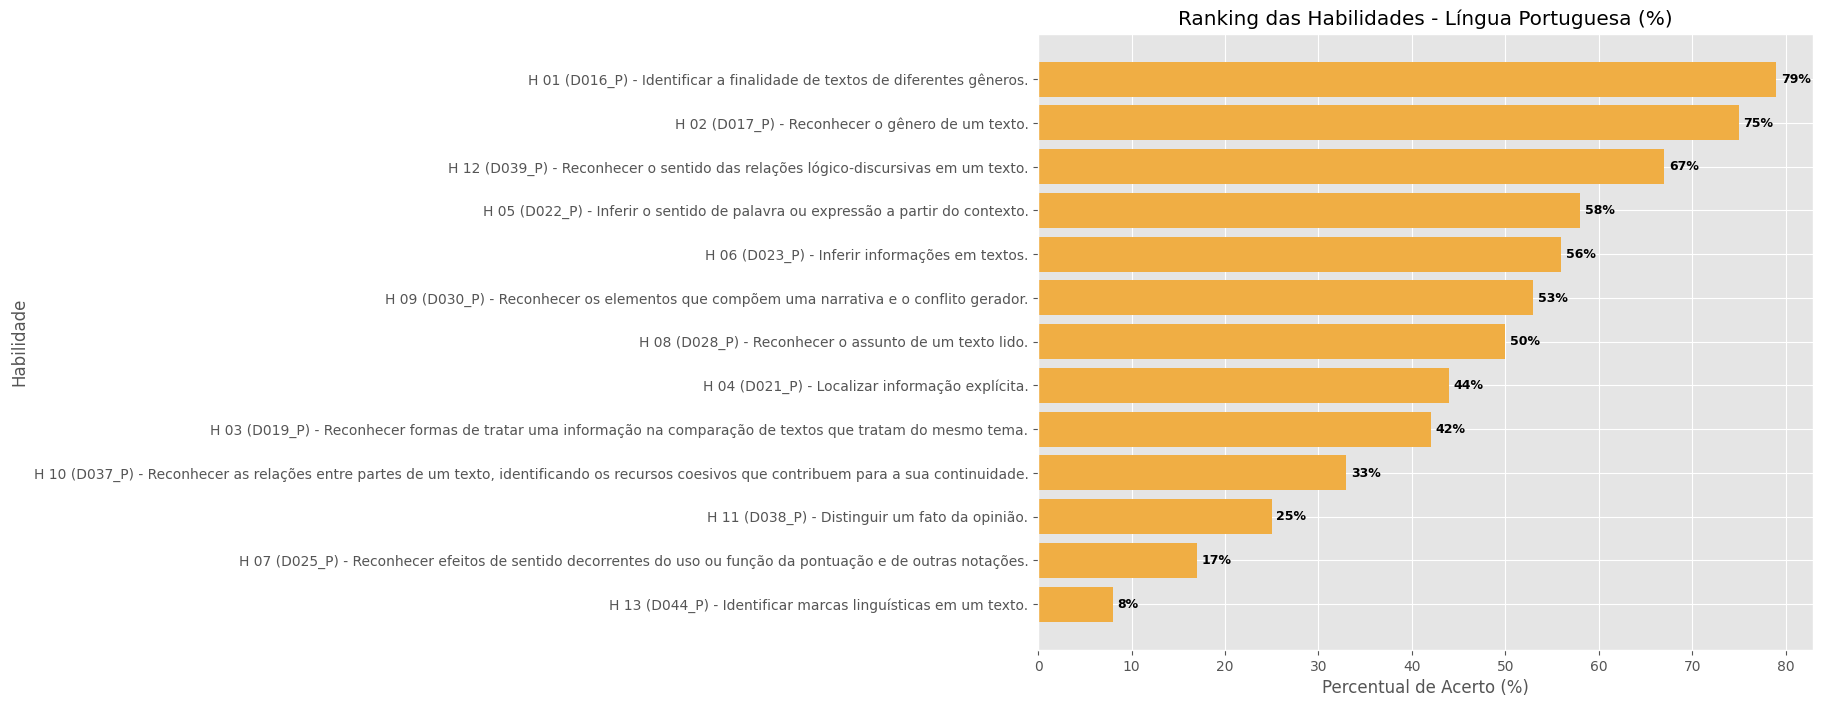

In [128]:
plt.figure(figsize=(10,8))
bars = plt.barh(
    df_hab_ranking_lp["Habilidade"],
    df_hab_ranking_lp["Habilidade - Acerto %"],
    color="#F0AE44"
)

plt.title("Ranking das Habilidades - Língua Portuguesa (%)")
plt.xlabel("Percentual de Acerto (%)")
plt.ylabel("Habilidade")

# Inverter para maior aparecer no topo
plt.gca().invert_yaxis()

# Mostrar só inteiros no eixo X
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Adicionar rótulo na ponta das barras
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5,                           # um pouco depois da barra
        bar.get_y() + bar.get_height()/2,
        f"{width:.0f}%",                       # sem casas decimais, em %
        ha="left", va="center",
        color="black", fontsize=9, fontweight="bold"
    )

plt.show()


In [129]:
# Seleciona colunas de habilidades usando o for
habilidades = [f"H {str(i).zfill(2)}" for i in range(1, 14)]

# Delimitando as colunas, assim fica uma linha para cada estudante com as suas habilidades
colunas = ["Estudante"] + habilidades

estudante_lp = estudante_lp[colunas]

In [130]:
# Função para separar acertos e total
def separar_valor(valor):
    try:
        acerto, total = valor.split("/")
        return int(acerto.strip()), int(total.strip()) # Retorna apenas o número, sem os espaços
    except:
        return None, None  # caso tenha vazio ou NaN

# Criar dois DataFrames: acertos e total
acertos = pd.DataFrame()
totais = pd.DataFrame()

for h in habilidades:
    acertos[h] = estudante_lp[h].apply(lambda x: separar_valor(x)[0])
    totais[h] = estudante_lp[h].apply(lambda x: separar_valor(x)[1])


In [131]:
from matplotlib.ticker import MaxNLocator # Biblioteca para exibir apenas números inteiros na legenda do eixo
plt.style.use("ggplot")

def plotar_grafico_estudante_lp(indice):
    estudante = estudante_lp.loc[indice, "Estudante"]
    x = habilidades
    y_barras = acertos.loc[indice].values
    y_linha = totais.loc[indice].values

    plt.figure(figsize=(10,6))
    plt.bar(x, y_barras, color="#F0AE44",label="Acertos", alpha=1)
    plt.plot(x, y_linha, color="black", marker="o", linestyle="--", label="Total de questões")

    plt.title(f"Desempenho em Língua Portuguesa: {estudante}")
    plt.xlabel("Habilidades")
    plt.ylabel("Quantidade")
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # <-- só inteiros
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


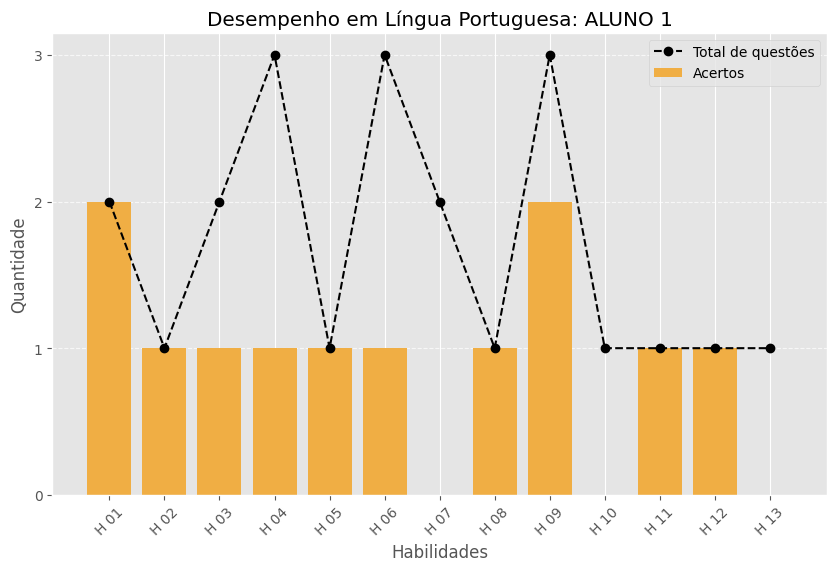

In [132]:
plotar_grafico_estudante_lp(0)

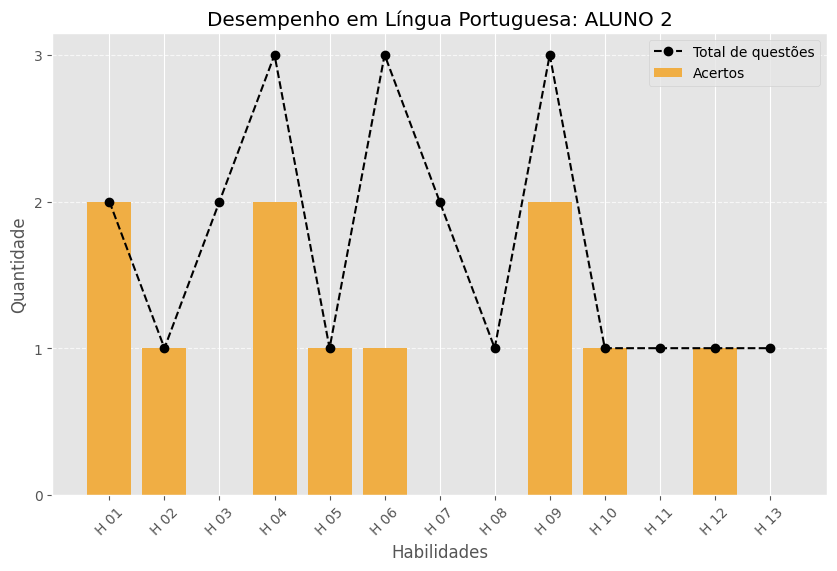

In [133]:
plotar_grafico_estudante_lp(1)

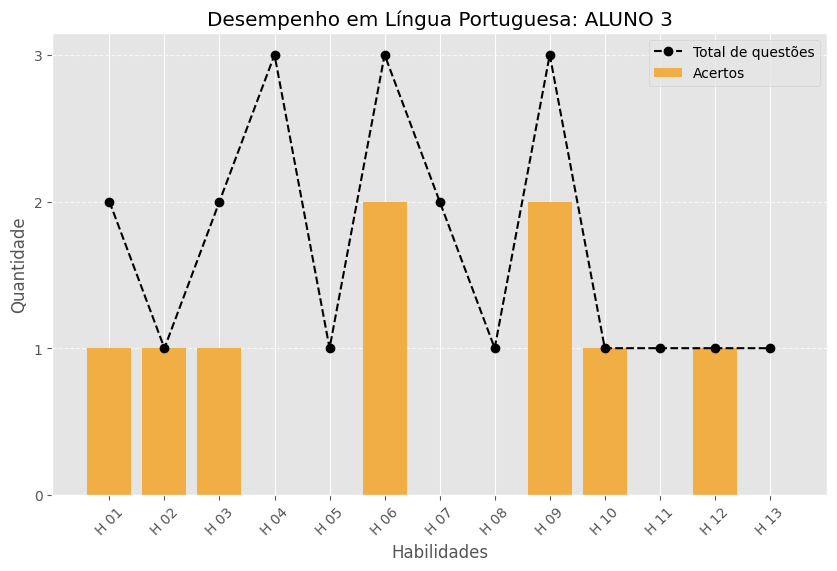

In [134]:
plotar_grafico_estudante_lp(2)

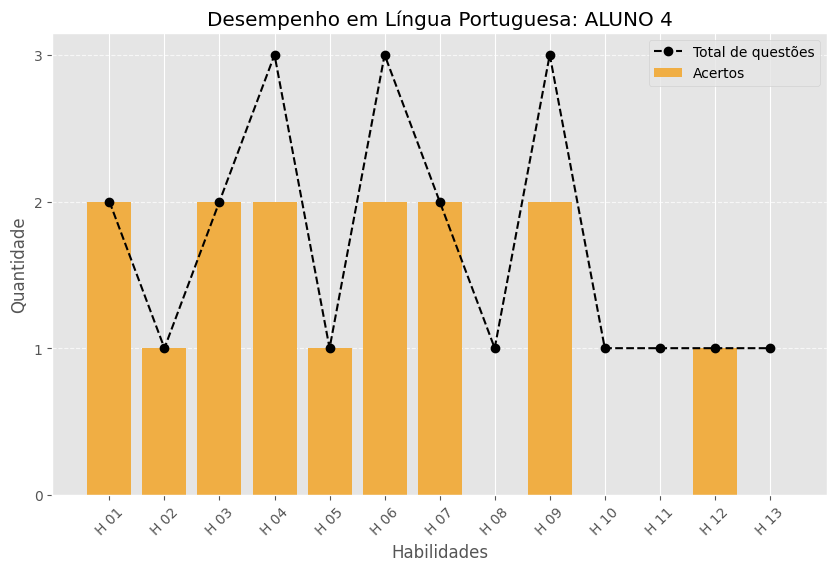

In [135]:
plotar_grafico_estudante_lp(3)

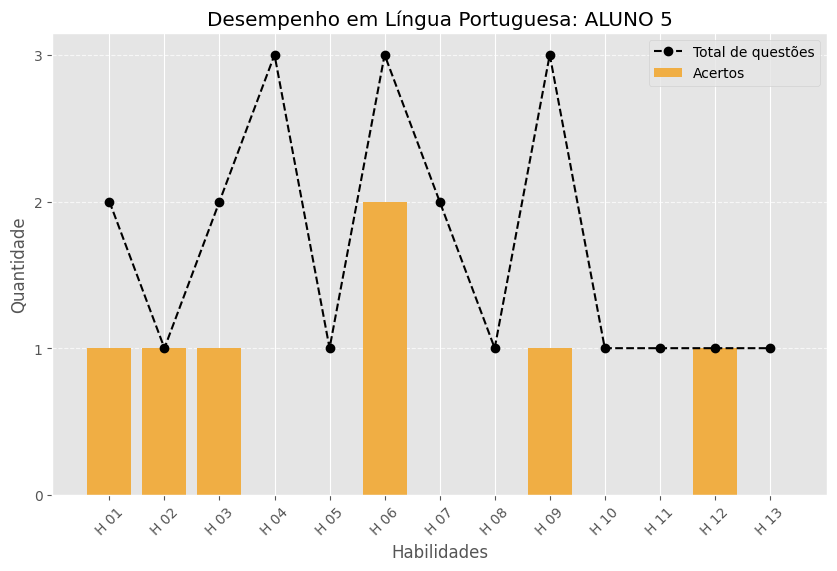

In [136]:
plotar_grafico_estudante_lp(4)

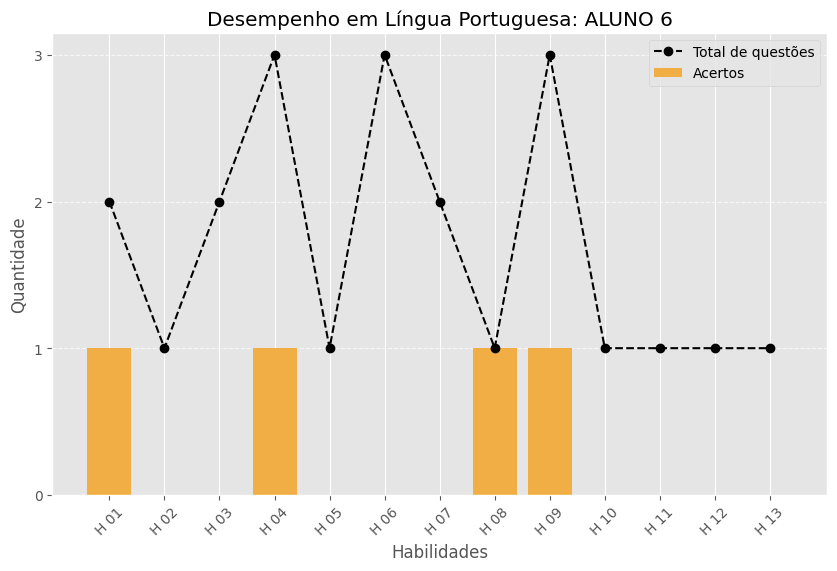

In [137]:
plotar_grafico_estudante_lp(5)

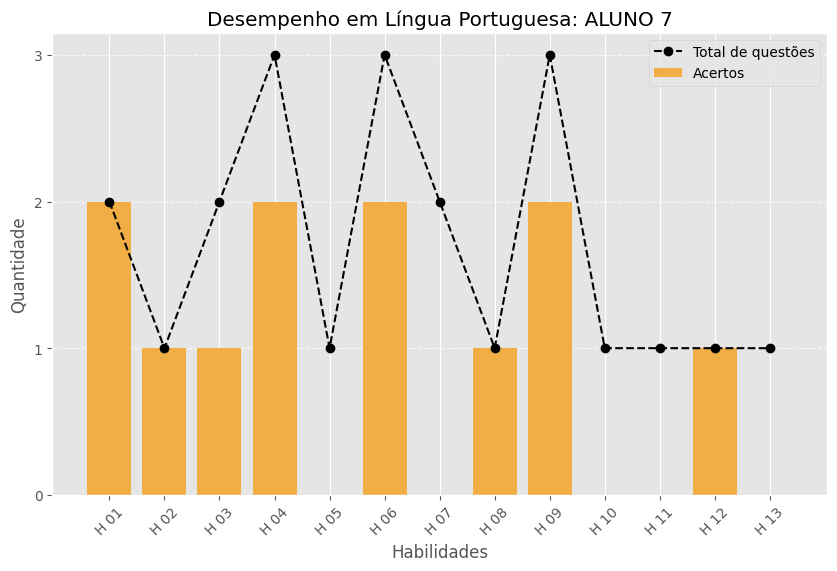

In [138]:
plotar_grafico_estudante_lp(6)

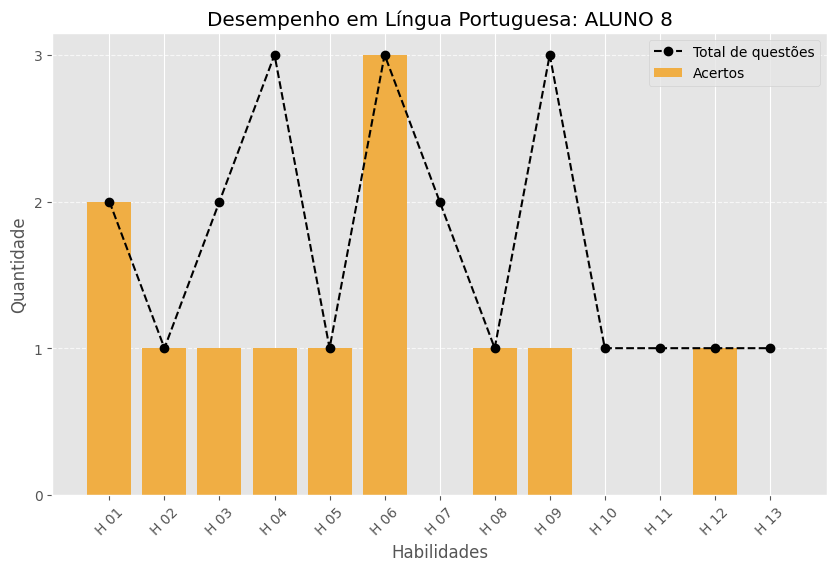

In [139]:
plotar_grafico_estudante_lp(7)

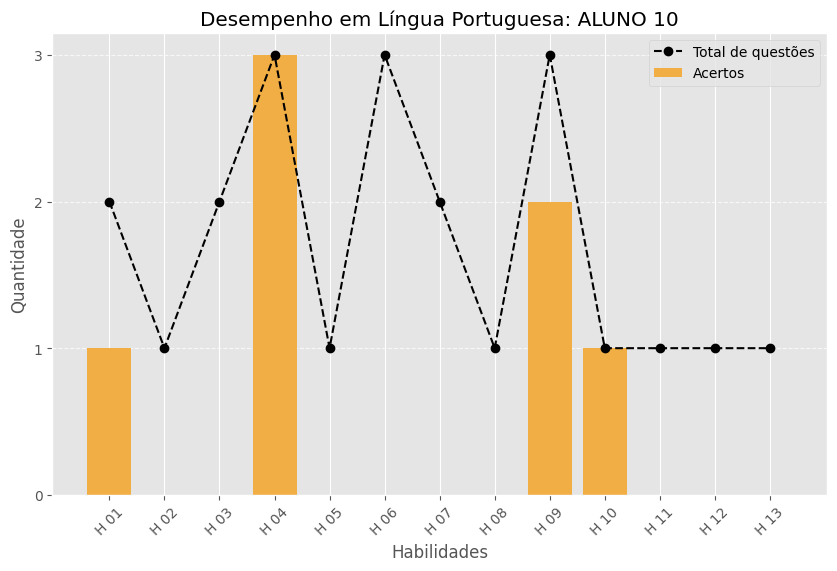

In [140]:
plotar_grafico_estudante_lp(9)

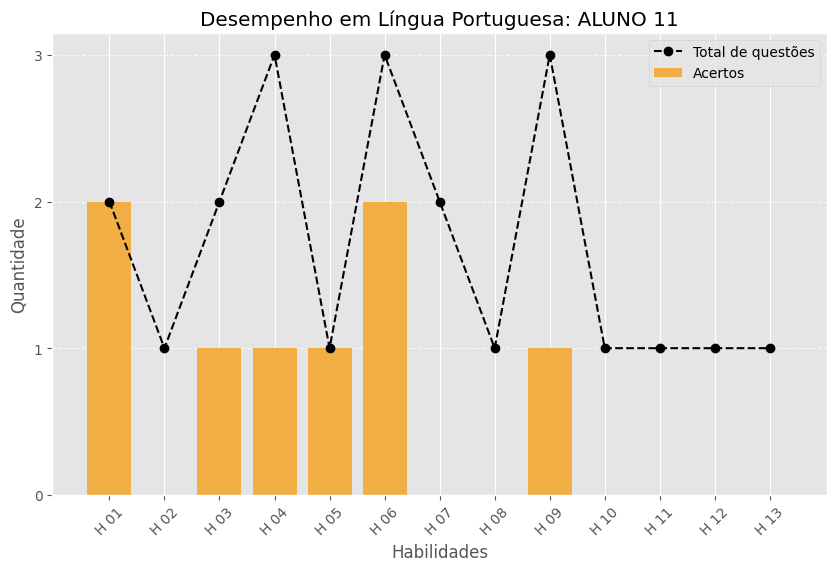

In [141]:
plotar_grafico_estudante_lp(10)

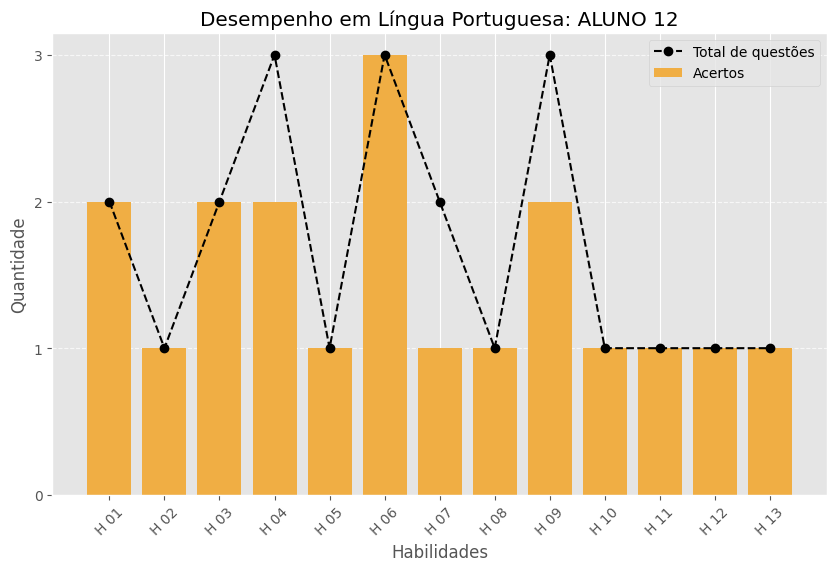

In [142]:
plotar_grafico_estudante_lp(11)

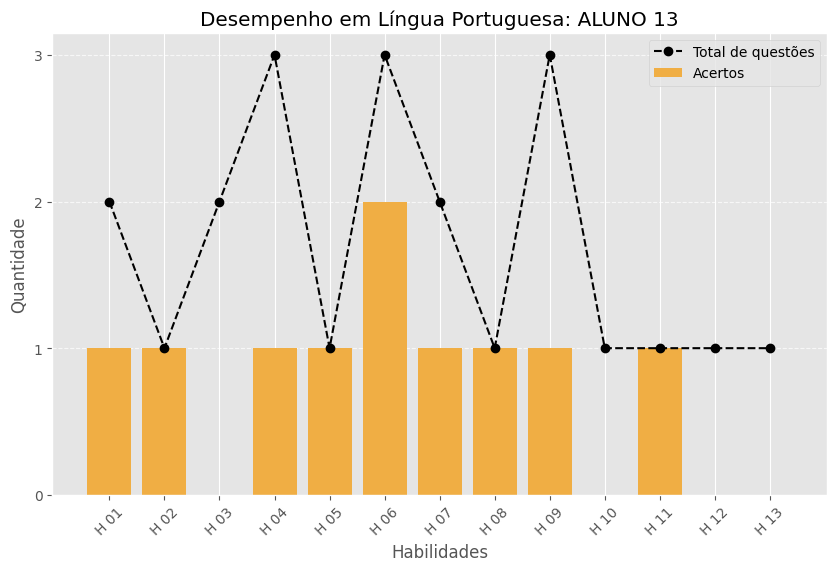

In [143]:
plotar_grafico_estudante_lp(12)

In [144]:
estudante_lp["Total_Acertos"] = acertos.sum(axis=1)

In [145]:
df_ranking_lp = estudante_lp[["Estudante", "Total_Acertos"]].sort_values(
    by="Total_Acertos", ascending=False
)


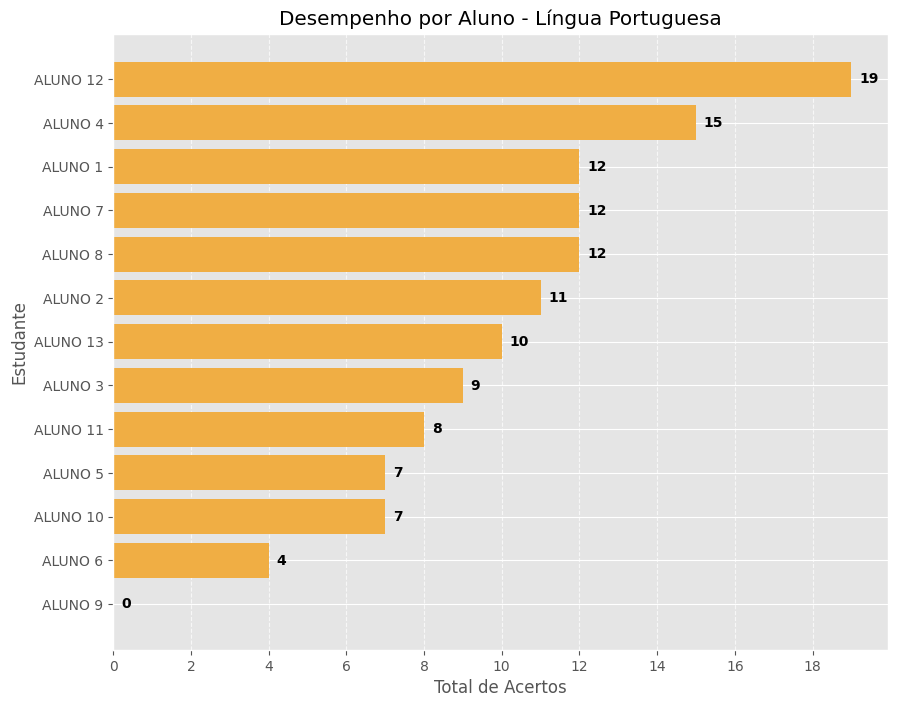

In [146]:
plt.figure(figsize=(10,8))
bars = plt.barh(df_ranking_lp["Estudante"], df_ranking_lp["Total_Acertos"], color="#F0AE44")

plt.title("Desempenho por Aluno - Língua Portuguesa")
plt.xlabel("Total de Acertos")
plt.ylabel("Estudante")

# Inverter para que o maior apareça no topo
plt.gca().invert_yaxis()

# Só inteiros no eixo X
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Adicionar rótulo na ponta da barra (sem .0)
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.2,                           # posição X → um pouco depois da ponta
        bar.get_y() + bar.get_height()/2,      # posição Y → centro da barra
        f"{int(width)}",                       # <-- força inteiro
        ha="left", va="center",
        color="black", fontsize=10, fontweight="bold"
    )

plt.show()


### MATEMATICA - transformando colunas em acertos e erros

In [147]:
# Ordenar do maior para o menor
df_hab_ranking_mt = habilidades_mt.sort_values(
    by="Habilidade - Acerto %", ascending=False
)


In [148]:
# Criando coluna combinada
df_hab_ranking_mt["Habilidade"] = (
    habilidades_mt["Habilidade - Posição (Código)"] + " - " + habilidades_mt["Habilidade - Descrição"]
)

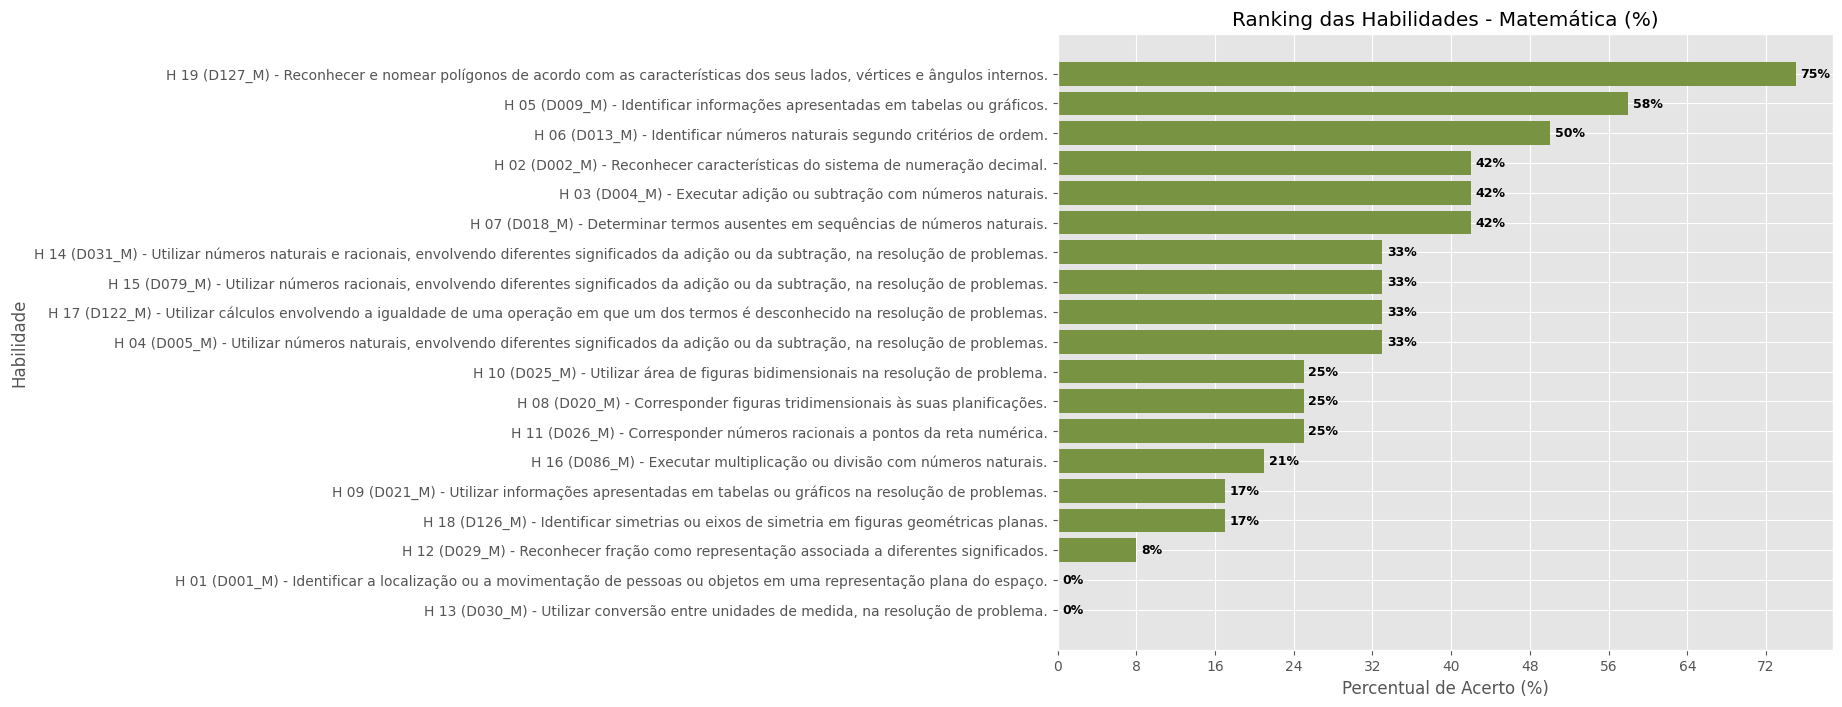

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
bars = plt.barh(
    df_hab_ranking_mt["Habilidade"],
    df_hab_ranking_mt["Habilidade - Acerto %"],
    color="#789342"
)

plt.title("Ranking das Habilidades - Matemática (%)")
plt.xlabel("Percentual de Acerto (%)")
plt.ylabel("Habilidade")

# Inverter para maior aparecer no topo
plt.gca().invert_yaxis()

# Mostrar só inteiros no eixo X
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Adicionar rótulo na ponta das barras
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5,                           # um pouco depois da barra
        bar.get_y() + bar.get_height()/2,
        f"{width:.0f}%",                       # sem casas decimais, em %
        ha="left", va="center",
        color="black", fontsize=9, fontweight="bold"
    )

plt.show()


In [150]:
# Seleciona colunas de interesse
habilidades = [f"H {str(i).zfill(2)}" for i in range(1, 14)]
colunas = ["Estudante"] + habilidades
estudante_mt = estudante_mt[colunas]

In [151]:
# Função para separar acertos e total
def separar_valor(valor):
    try:
        acerto, total = valor.split("/")
        return int(acerto.strip()), int(total.strip())
    except:
        return None, None  # caso tenha vazio ou NaN

# Criar dois DataFrames: acertos e total
acertos = pd.DataFrame()
totais = pd.DataFrame()

for h in habilidades:
    acertos[h] = estudante_lp[h].apply(lambda x: separar_valor(x)[0])
    totais[h] = estudante_lp[h].apply(lambda x: separar_valor(x)[1])


In [152]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.use("ggplot")

def plotar_grafico_estudante_mt(indice):
    estudante = estudante_mt.loc[indice, "Estudante"]
    x = habilidades
    y_barras = acertos.loc[indice].values
    y_linha = totais.loc[indice].values

    plt.figure(figsize=(10,6))
    plt.bar(x, y_barras, color="#789342",label="Acertos", alpha=1)
    plt.plot(x, y_linha, color="black", marker="o", linestyle="--", label="Total de questões")

    plt.title(f"Desempenho em Matemática: {estudante}")
    plt.xlabel("Habilidades")
    plt.ylabel("Quantidade")
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))  # <-- só inteiros
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


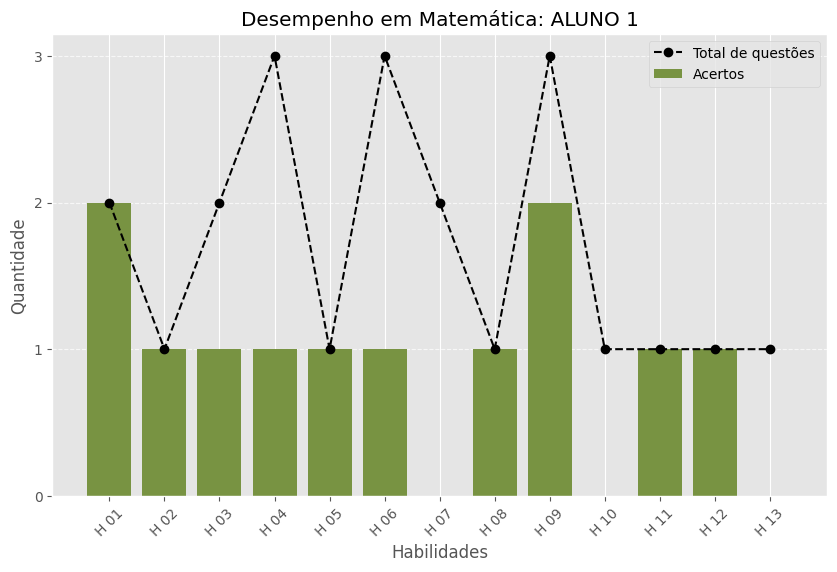

In [153]:
plotar_grafico_estudante_mt(0)

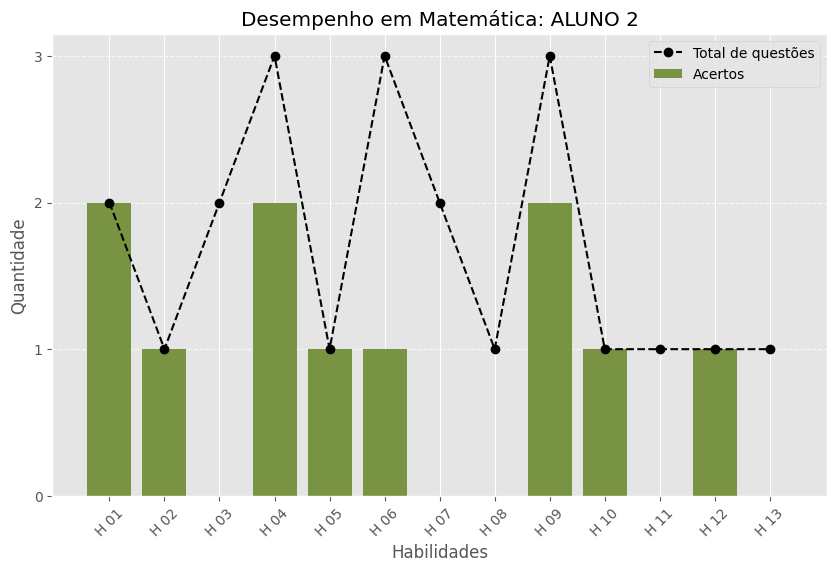

In [154]:
plotar_grafico_estudante_mt(1)

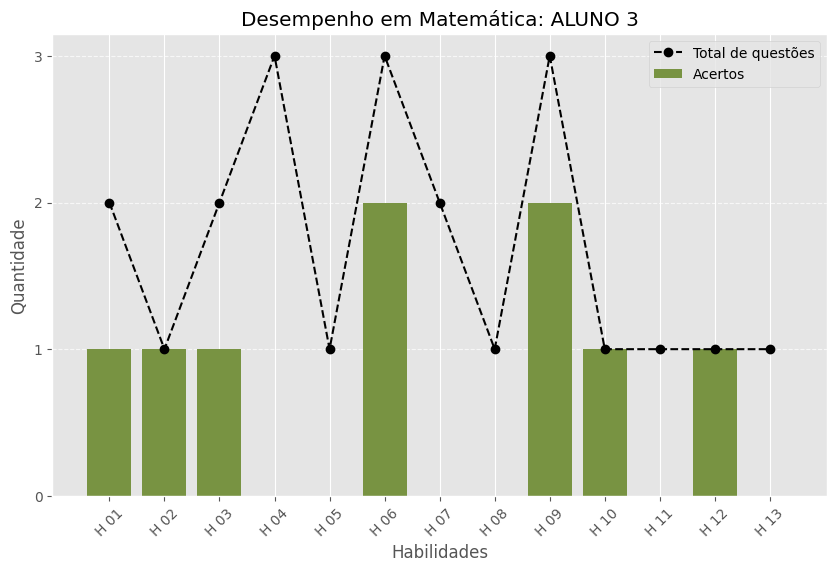

In [155]:
plotar_grafico_estudante_mt(2)

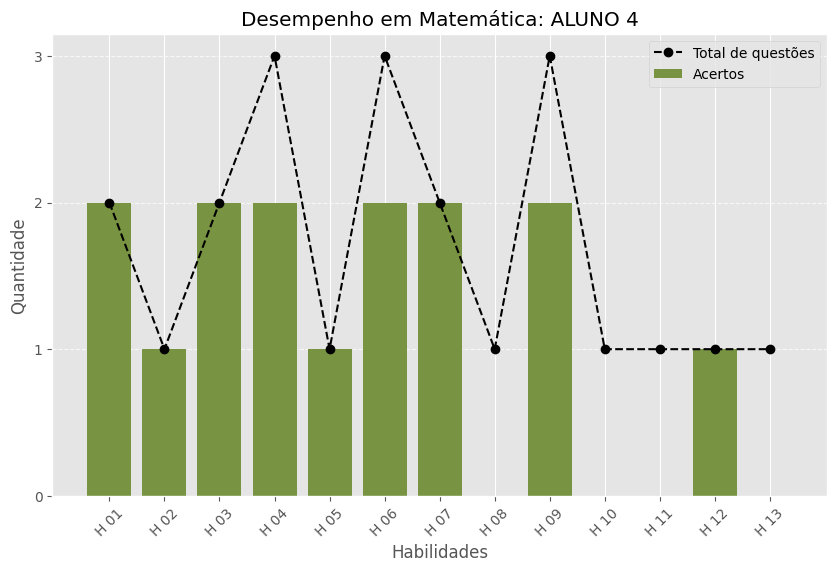

In [156]:
plotar_grafico_estudante_mt(3)

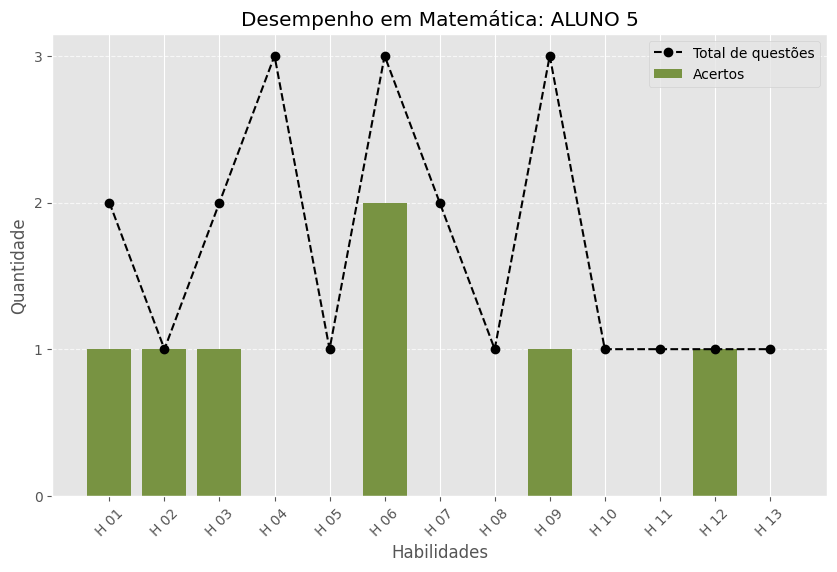

In [157]:
plotar_grafico_estudante_mt(4)

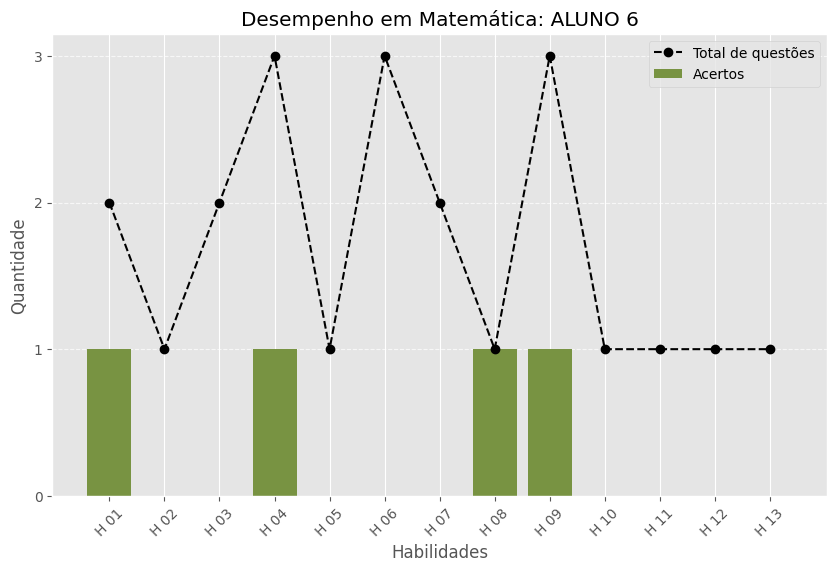

In [158]:
plotar_grafico_estudante_mt(5)

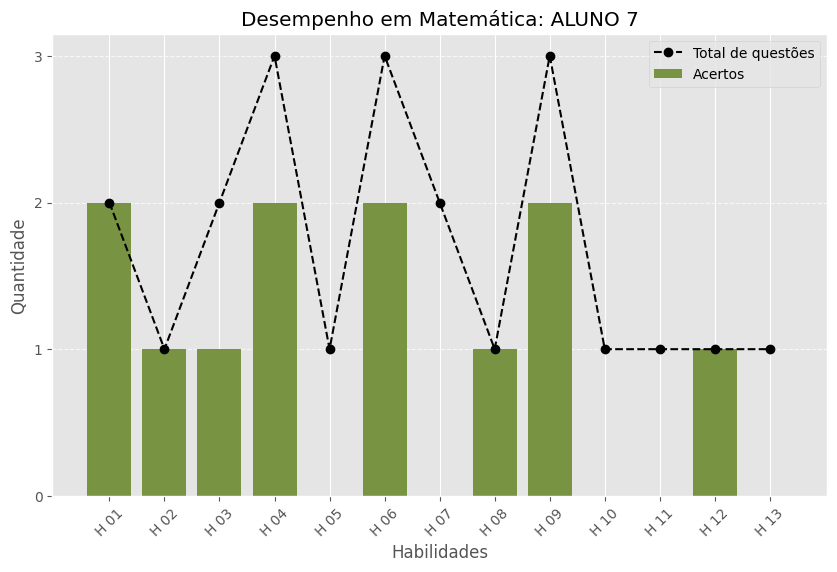

In [159]:
plotar_grafico_estudante_mt(6)

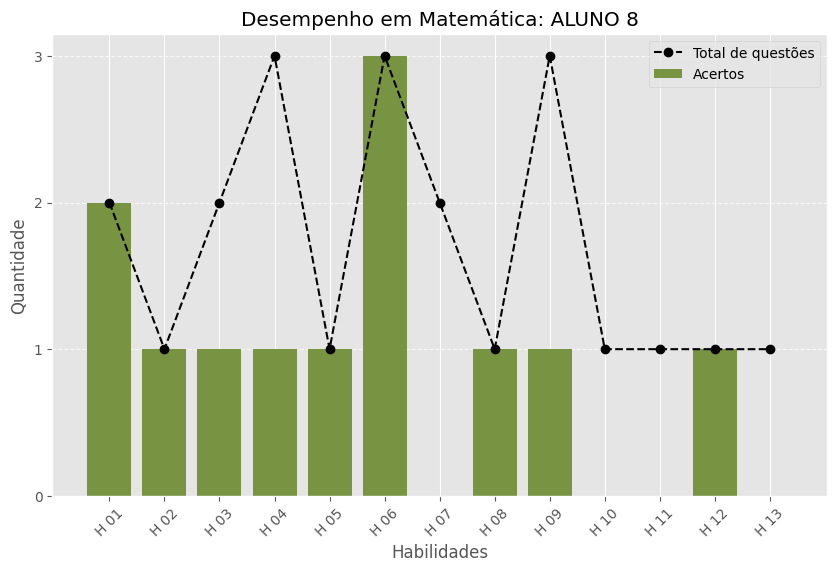

In [160]:
plotar_grafico_estudante_mt(7)

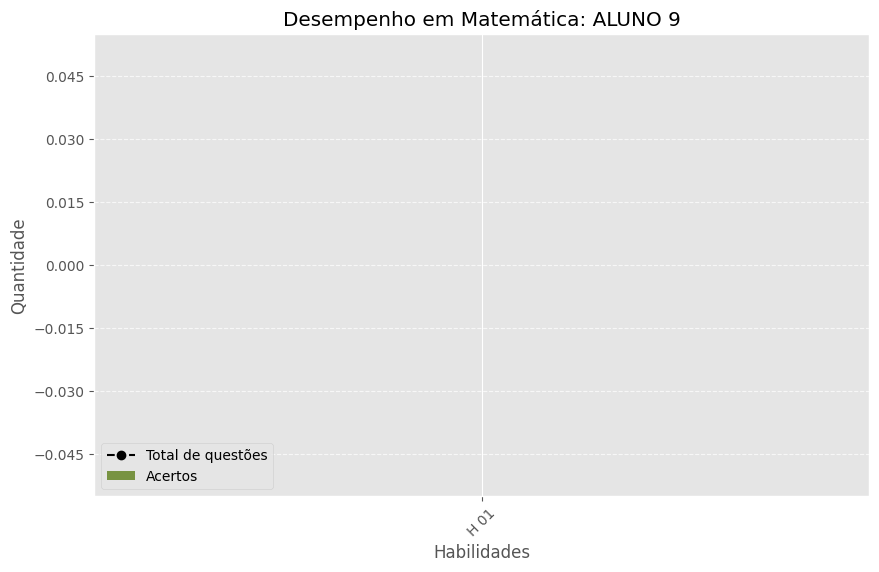

In [161]:
plotar_grafico_estudante_mt(8)

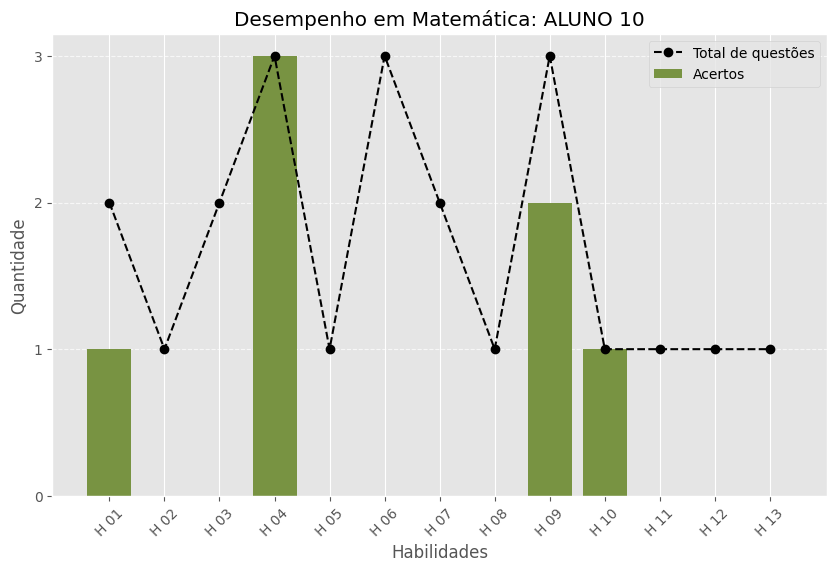

In [162]:
plotar_grafico_estudante_mt(9)

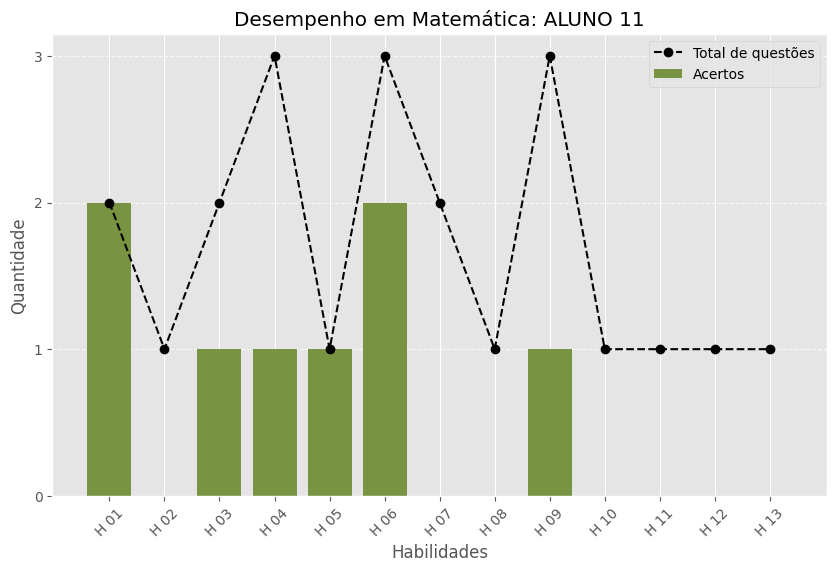

In [163]:
plotar_grafico_estudante_mt(10)

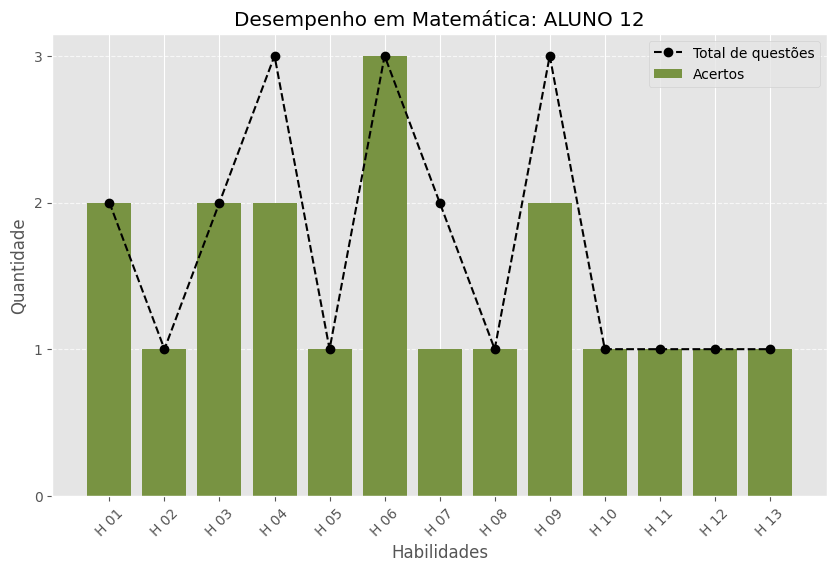

In [164]:
plotar_grafico_estudante_mt(11)

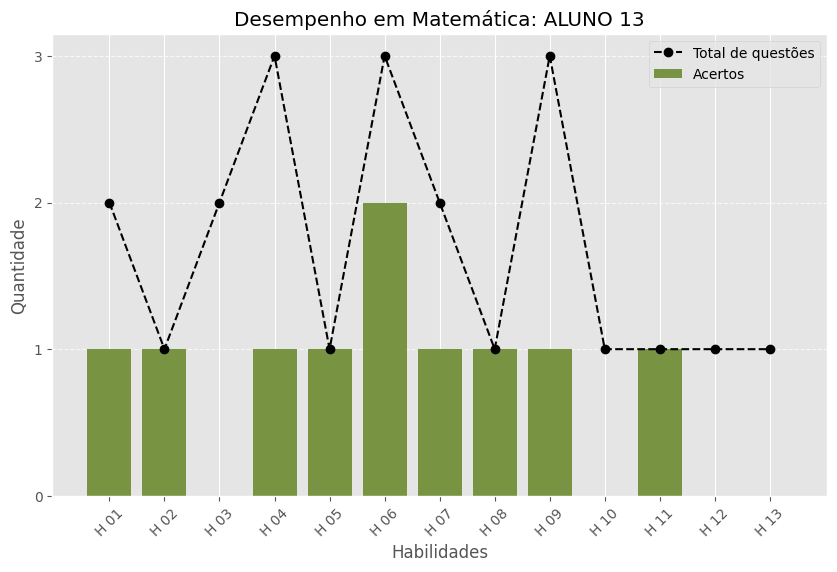

In [165]:
plotar_grafico_estudante_mt(12)

In [166]:
estudante_mt["Total_Acertos"] = acertos.sum(axis=1)

In [167]:
df_ranking = estudante_mt[["Estudante", "Total_Acertos"]].sort_values(
    by="Total_Acertos", ascending=False
)


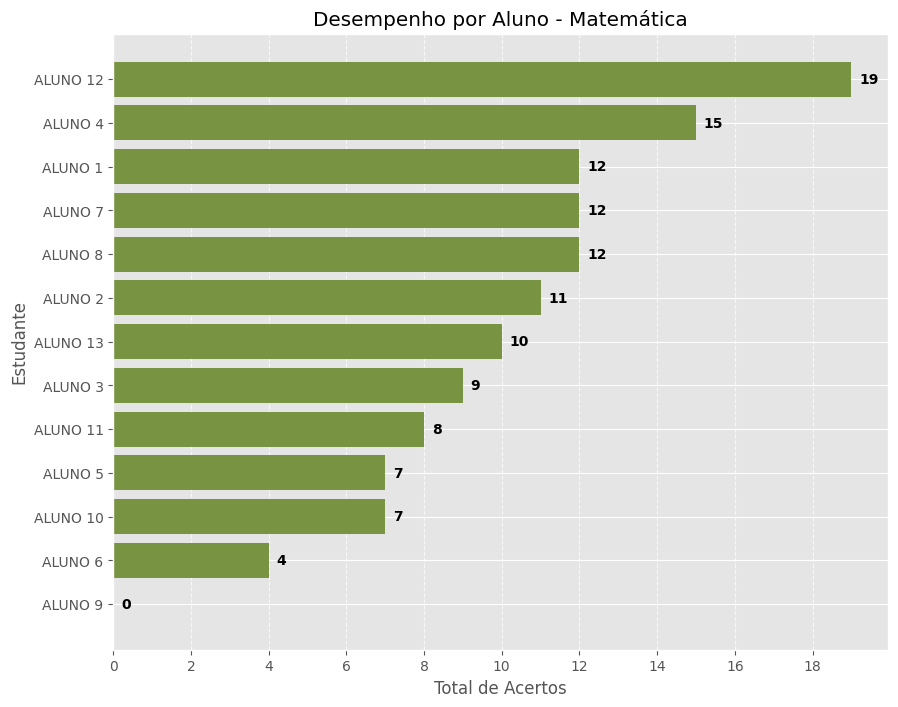

In [168]:
plt.figure(figsize=(10,8))
bars = plt.barh(df_ranking["Estudante"], df_ranking["Total_Acertos"], color="#789342")

plt.title("Desempenho por Aluno - Matemática")
plt.xlabel("Total de Acertos")
plt.ylabel("Estudante")

# Inverter para que o maior apareça no topo
plt.gca().invert_yaxis()

# Só inteiros no eixo X
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Adicionar rótulo na ponta da barra (sem .0)
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.2,                           # posição X → um pouco depois da ponta
        bar.get_y() + bar.get_height()/2,      # posição Y → centro da barra
        f"{int(width)}",                       # <-- força inteiro
        ha="left", va="center",
        color="black", fontsize=10, fontweight="bold"
    )

plt.show()
